<a href="https://colab.research.google.com/github/vivekr25-dev/Python/blob/main/Lung_Cancer_Risk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import kagglehub
import os
import seaborn as sns

# Download latest version
path = kagglehub.dataset_download("aizahzeeshan/lung-cancer-risk-in-25-countries")
print("Path to dataset files:", path)
print("Files in the dataset folder:", os.listdir(path))

# Use the correct CSV file name
csv_file_path = os.path.join(path, "lung_cancer_prediction_dataset.csv")
df = pd.read_csv(csv_file_path)
df.head()

100%|██████████| 3.30M/3.30M [00:00<00:00, 139MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/aizahzeeshan/lung-cancer-risk-in-25-countries/versions/1
Files in the dataset folder: ['lung_cancer_prediction_dataset.csv']


,ID,Country,Population_Size,Age,Gender,Smoker,Years_of_Smoking,Cigarettes_per_Day,Passive_Smoker,Family_History,...,Air_Pollution_Exposure,Occupational_Exposure,Indoor_Pollution,Healthcare_Access,Early_Detection,Treatment_Type,Developed_or_Developing,Annual_Lung_Cancer_Deaths,Lung_Cancer_Prevalence_Rate,Mortality_Rate
0,0,China,1400,80,Male,Yes,30,29,No,No,...,Low,Yes,No,Poor,No,NaN,Developing,690000,2.44,0.0
1,1,Iran,84,53,Male,No,0,0,Yes,No,...,Low,Yes,No,Poor,No,NaN,Developing,27000,2.10,0.0
2,2,Mexico,128,47,Male,Yes,12,6,Yes,No,...,Medium,No,No,Poor,Yes,NaN,Developing,28000,1.11,0.0
3,3,Indonesia,273,39,Female,No,0,0,No,Yes,...,Low,No,No,Poor,No,NaN,Developing,40000,0.75,0.0
4,4,South Africa,59,44,Female,No,0,0,Yes,No,...,Medium,Yes,No,Poor,No,NaN,Developing,15000,2.44,0.0


In [ ]:
df.columns

Index(['ID', 'Country', 'Population_Size', 'Age', 'Gender', 'Smoker',
       'Years_of_Smoking', 'Cigarettes_per_Day', 'Passive_Smoker',
       'Family_History', 'Lung_Cancer_Diagnosis', 'Cancer_Stage',
       'Survival_Years', 'Adenocarcinoma_Type', 'Air_Pollution_Exposure',
       'Occupational_Exposure', 'Indoor_Pollution', 'Healthcare_Access',
       'Early_Detection', 'Treatment_Type', 'Developed_or_Developing',
       'Annual_Lung_Cancer_Deaths', 'Lung_Cancer_Prevalence_Rate',
       'Mortality_Rate'],
      dtype='object')

In [ ]:
df.dtypes #view data types in the dataframe

,0
ID,int64
Country,object
Population_Size,int64
Age,int64
Gender,object
Smoker,object
Years_of_Smoking,int64
Cigarettes_per_Day,int64
Passive_Smoker,object
Family_History,object


In [ ]:
df.describe()

,ID,Population_Size,Age,Years_of_Smoking,Cigarettes_per_Day,Survival_Years,Annual_Lung_Cancer_Deaths,Lung_Cancer_Prevalence_Rate,Mortality_Rate
count,220632.000000,220632.000000,220632.000000,220632.000000,220632.000000,220632.000000,220632.000000,220632.000000,220632.000000
mean,110315.500000,229.779882,52.518352,8.175274,7.007515,0.223526,63931.086928,1.502085,3.049802
std,63691.116633,349.247477,19.078215,12.377248,9.802187,1.231025,130690.126777,0.578043,14.924169
min,0.000000,54.000000,20.000000,0.000000,0.000000,0.000000,10005.000000,0.500000,0.000000
25%,55157.750000,83.000000,36.000000,0.000000,0.000000,0.000000,23000.000000,1.000000,0.000000
50%,110315.500000,113.000000,53.000000,0.000000,0.000000,0.000000,30000.000000,1.500000,0.000000
75%,165473.250000,206.000000,69.000000,15.000000,14.000000,0.000000,45000.000000,2.000000,0.000000
max,220631.000000,1400.000000,85.000000,40.000000,30.000000,10.000000,690000.000000,2.500000,90.000000


In [ ]:
#unique values
df.nunique()

,0
ID,220632
Country,25
Population_Size,25
Age,66
Gender,2
Smoker,2
Years_of_Smoking,41
Cigarettes_per_Day,27
Passive_Smoker,2
Family_History,2


In [ ]:
#missing values
df.isnull().sum()

,0
ID,0
Country,0
Population_Size,0
Age,0
Gender,0
Smoker,0
Years_of_Smoking,0
Cigarettes_per_Day,0
Passive_Smoker,0
Family_History,0


<Axes: xlabel='Age', ylabel='Count'>

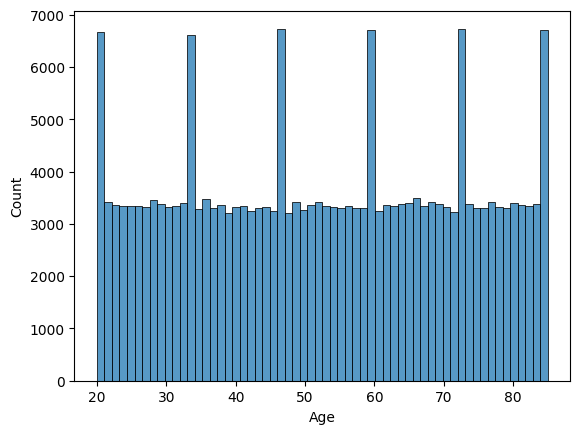

In [ ]:
sns.histplot(df['Age'])

<Axes: xlabel='Lung_Cancer_Diagnosis', ylabel='count'>

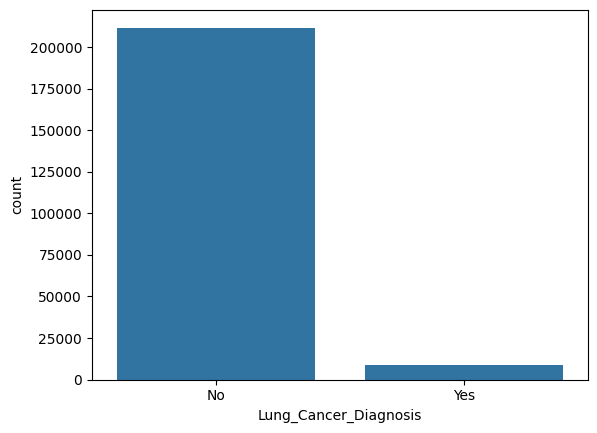

In [ ]:
sns.countplot(x='Lung_Cancer_Diagnosis', data=df)

<Axes: xlabel='Air_Pollution_Exposure', ylabel='Lung_Cancer_Prevalence_Rate'>

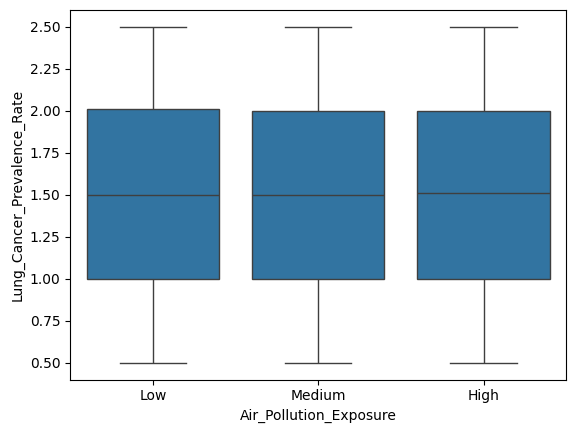

In [ ]:
sns.boxplot(x='Air_Pollution_Exposure', y='Lung_Cancer_Prevalence_Rate', data=df)

In [ ]:
# Get a list of numerical columns
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print("\nNumerical columns:", num_cols)


Numerical columns: ['ID', 'Population_Size', 'Age', 'Years_of_Smoking', 'Cigarettes_per_Day', 'Survival_Years', 'Annual_Lung_Cancer_Deaths', 'Lung_Cancer_Prevalence_Rate', 'Mortality_Rate']


<Axes: xlabel='Country'>

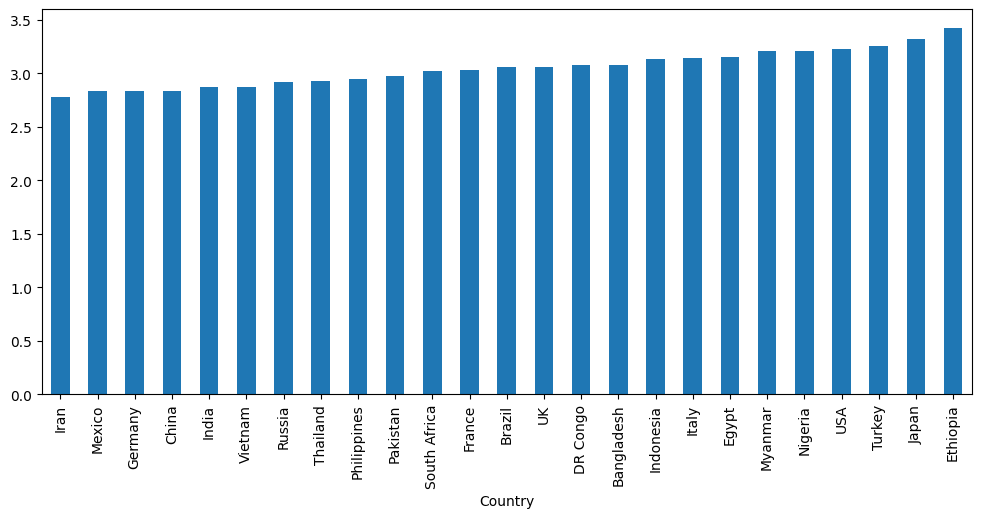

In [ ]:
df.groupby('Country')['Mortality_Rate'].mean().sort_values().plot(kind='bar', figsize=(12, 5))

<Axes: xlabel='Developed_or_Developing', ylabel='Lung_Cancer_Prevalence_Rate'>

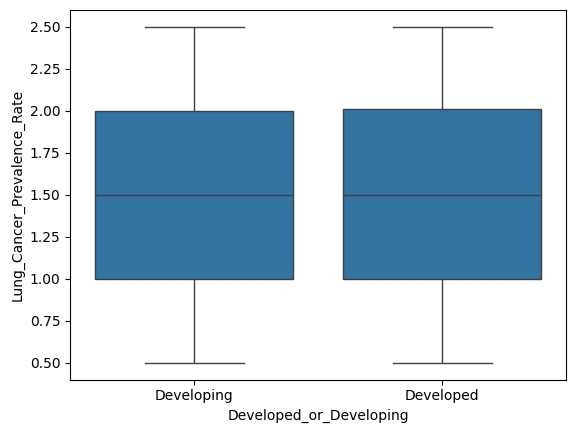

In [ ]:
sns.boxplot(x='Developed_or_Developing', y='Lung_Cancer_Prevalence_Rate', data=df)

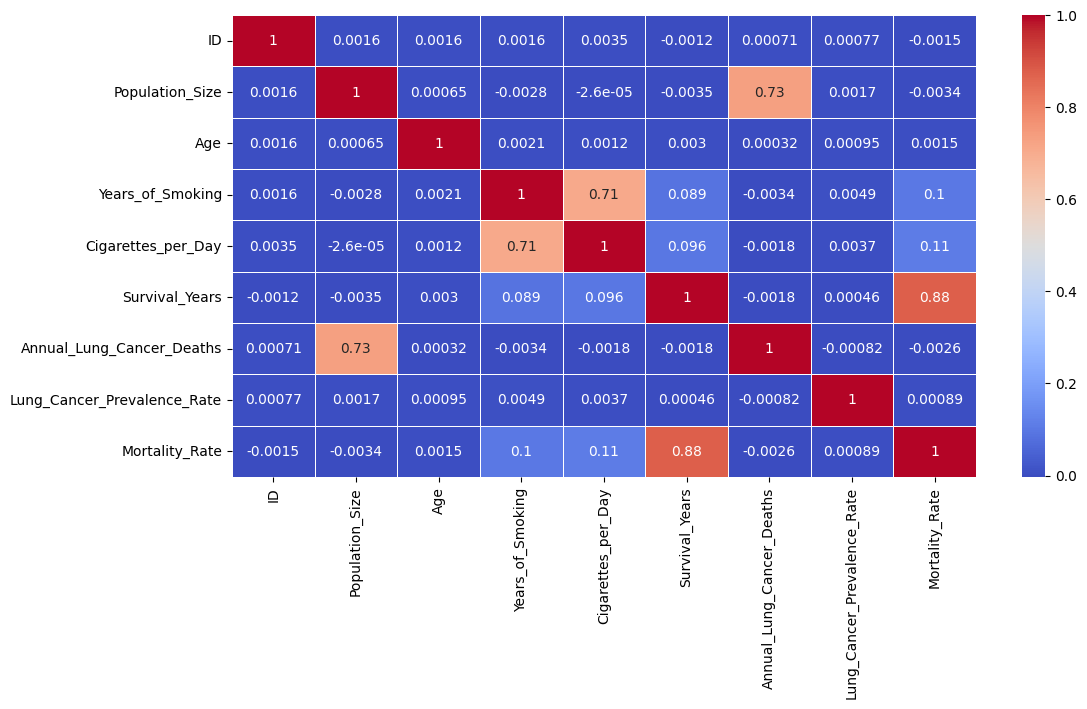

In [3]:
from matplotlib import pyplot as plt
import seaborn as sns
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Compute correlation
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(12,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm",linewidth=.5)
plt.show()



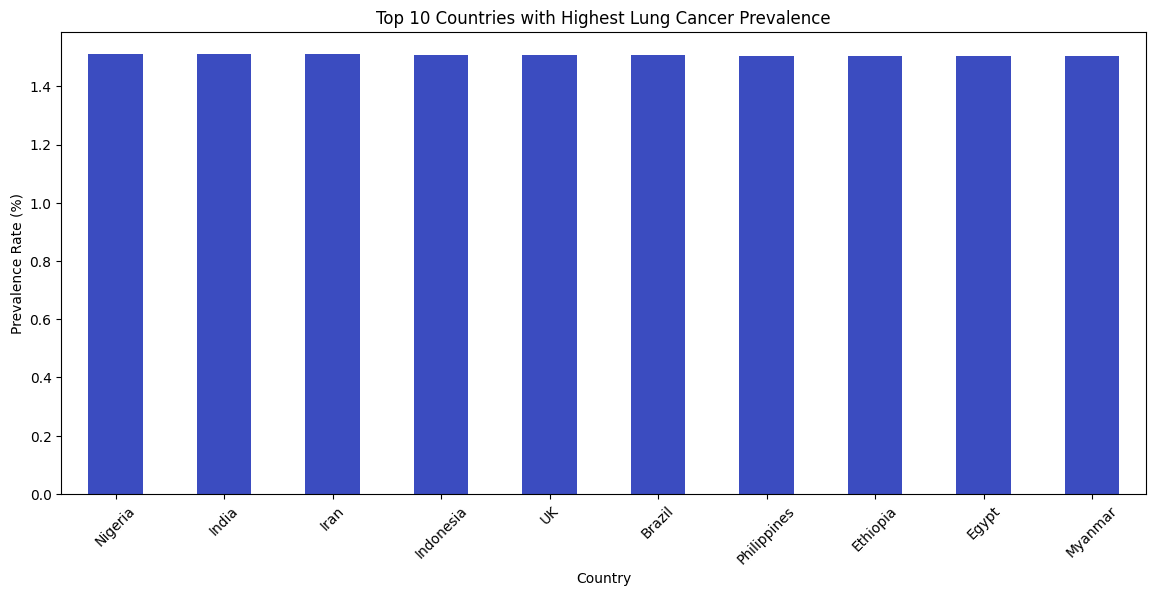

In [ ]:
plt.figure(figsize=(14, 6))
top_countries = df.groupby("Country")["Lung_Cancer_Prevalence_Rate"].mean().sort_values(ascending=False).head(10)
top_countries.plot(kind='bar', colormap='coolwarm')
plt.title("Top 10 Countries with Highest Lung Cancer Prevalence")
plt.ylabel("Prevalence Rate (%)")
plt.xticks(rotation=45)
plt.show()


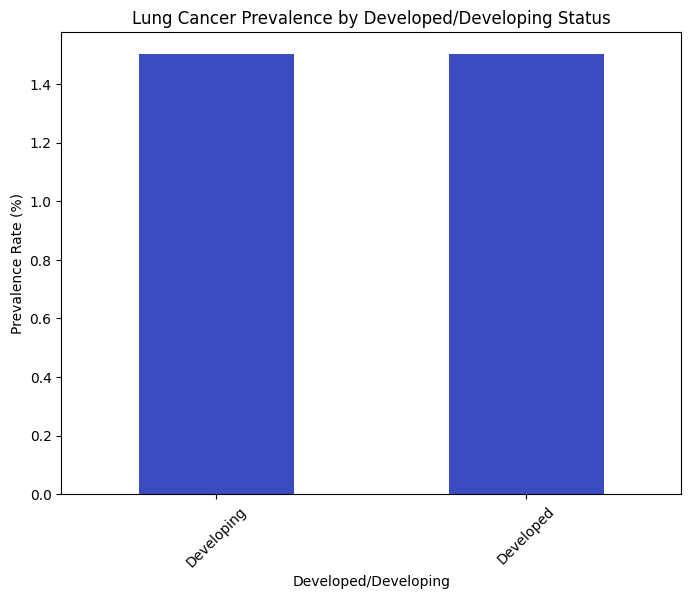

In [ ]:
plt.figure(figsize=(8, 6))
top_countries = df.groupby("Developed_or_Developing")["Lung_Cancer_Prevalence_Rate"].mean().sort_values(ascending=False).head(10)
ax = top_countries.plot(kind='bar', colormap='coolwarm')

plt.title("Lung Cancer Prevalence by Developed/Developing Status")
plt.xlabel("Developed/Developing")
plt.ylabel("Prevalence Rate (%)")
plt.xticks(rotation=45)
plt.show()
